# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicame demonstrate higher efficacy in terms of reducing tumor mass when compared to Infubinol or Ceftamin. This is revealed by the boxplot that clearly demonstrates final tumor mass for mice treated by these two drugs was significantly lower than final tumor mass for mice treated by the other two drugs. The positive effects of Capomulin is also demonstrated by the line graph (tumor mass over time) of one mouse treated by Capomulin, as the tumor mass steadily decreases over the course of the study. Lastly, the correlation and regression anlyses demonstrate the positive correlation between the weight of the mouse and the mass of their tumor. This information could be relevant in further analyses surrounding the relationship between weight and cancer mass/prevelence.  
 

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [73]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [74]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data.groupby(['Mouse ID', 'Timepoint']).filter(lambda x: len(x) > 1)
print(duplicate_mice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [75]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_indices = duplicate_mice.index
cleaned_data = combined_data.drop(index=duplicate_indices)
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [76]:
# Checking the number of mice in the clean DataFrame.
unique_mouse_ids = cleaned_data['Mouse ID'].nunique()
unique_mouse_ids

249

## Summary Statistics

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

#grouped data by Drug Regimen
grouped_data = cleaned_data.groupby('Drug Regimen')

#calculate each statistic for Tumor Volume
mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume SEM": sem_tumor_volume
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [78]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_adv = grouped_data['Tumor Volume (mm3)'].agg(
    mean='mean', 
    median='median', 
    variance='var', 
    std='std', 
    sem='sem'
)
summary_stats_adv

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

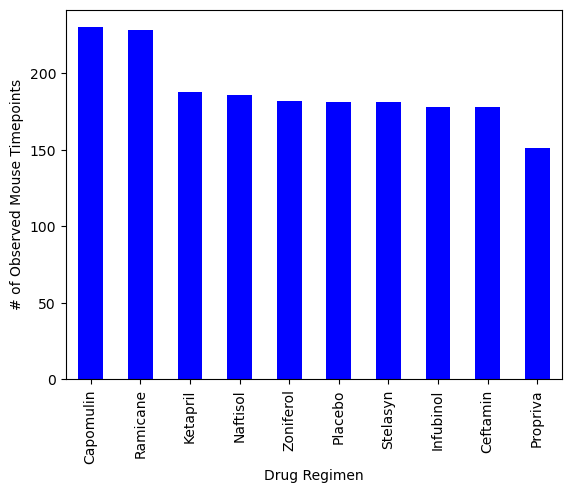

In [79]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = cleaned_data['Drug Regimen'].value_counts()
regimen_counts.plot.bar(color='blue')

# Adding labels and title for clarity
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

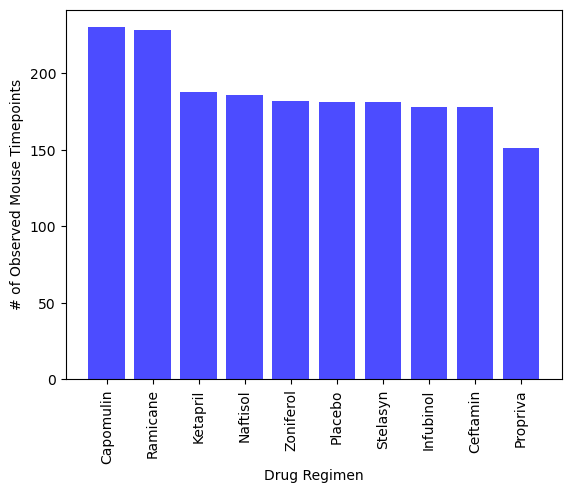

In [80]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(regimen_counts.index, regimen_counts.values, color='blue', alpha=0.7)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()


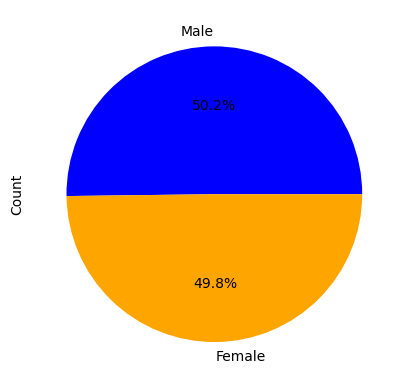

In [81]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = cleaned_data.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()


# Make the pie chart
unique_mice_gender.plot.pie(autopct='%1.1f%%', colors=['blue','orange'], ylabel='Count')
plt.show()


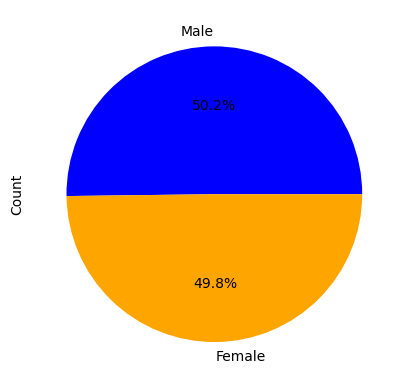

In [39]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender 
#use subset to target Mouse ID to identify duplicates
unique_mice_gender = cleaned_data.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()


# Make the pie chart
plt.pie(unique_mice_gender, labels=unique_mice_gender.index, autopct='%1.1f%%', colors=['blue','orange'])
plt.ylabel('Count')
plt.show()



## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# get last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_data = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'])
final_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [70]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:


    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = final_data[final_data['Drug Regimen'] == treatment]
    

    # add subset
    Q1 = subset['Tumor Volume (mm3)'].quantile(0.25)
    Q3 = subset['Tumor Volume (mm3)'].quantile(0.75)
    IQR = Q3 - Q1


    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = subset[(subset['Tumor Volume (mm3)'] < lower_bound) | (subset['Tumor Volume (mm3)'] > upper_bound)]
    
    print(f"{treatment}'s potential outliers:", outliers['Tumor Volume (mm3)'])


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


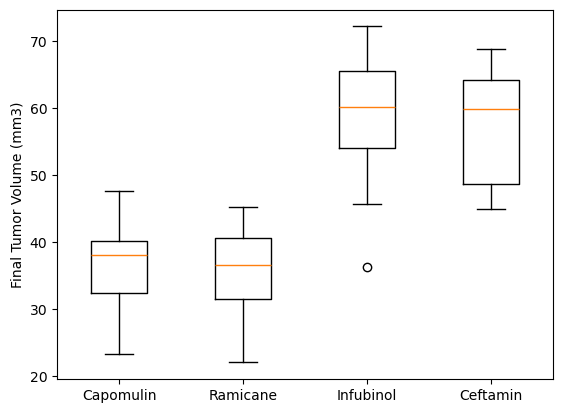

In [52]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot([final_data[final_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments],
            labels=treatments) 
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

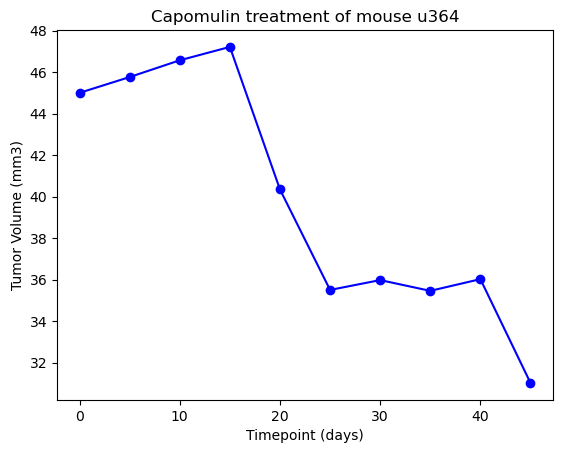

In [61]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'u364']

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.title('Capomulin treatment of mouse u364')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

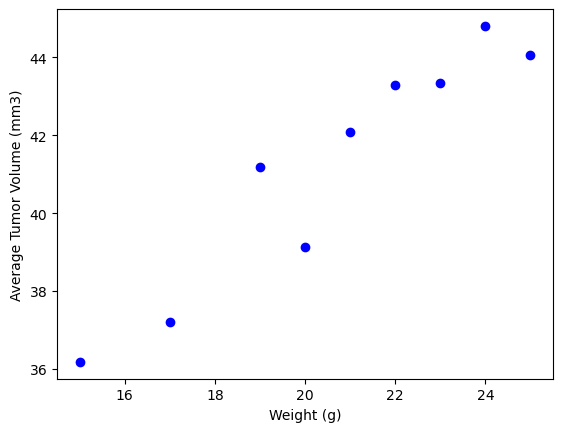

In [71]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Group weights and calculate the avg tumor volume
average_tumor_volume = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index() #reset index used to converted group dataframe back into standard dataframe
# make the scatter plot
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='b', marker='o')
#labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.9505243961855268


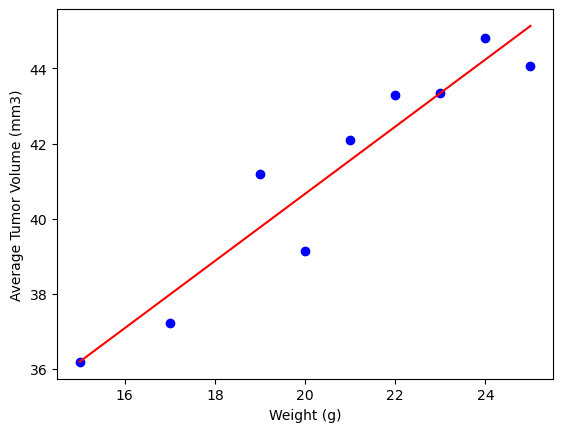

In [69]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = average_tumor_volume['Weight (g)'].corr(average_tumor_volume['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

#linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])


# create lin. reg. line
regression_line = slope * average_tumor_volume['Weight (g)'] + intercept

# Create the scatter plot
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='b', marker='o')
plt.plot(average_tumor_volume['Weight (g)'], regression_line, color='r')  # Add the regression line

#labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()